## Как изменился рейтинг фильмов FANDANGO после [статьи](https://fivethirtyeight.com/features/fandango-movies-ratings/) Хики

 В октябре 2015 года Уолт Хики из FiveThirtyEight опубликовал [статью](https://fivethirtyeight.com/features/fandango-movies-ratings), в которой он представил веские доказательства того, что система рейтинга фильмов Fandango была предвзятой и нечестной. В этом проекте анализируются более свежие данные о рейтингах фильмов, чтобы определить, были ли какие-либо изменения в рейтинговой системе Fandango после анализа Хики.

Будем работать с двумя выборками рейтингов фильмов: данные в одной выборке были собраны до анализа Хикки, в то время как другая выборка была собрана после. Начнем с чтения двух образцов (которые хранятся в виде CSV-файлов:[fandango_score_comparison.csv](https://github.com/fivethirtyeight/data/tree/master/fandango),[movie_ratings_16_17.csv](https://github.com/mircealex/Movie_ratings_2016_17) и ознакомления с их структурой.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
previous=pd.read_csv("fandango_score_comparison.csv")

In [46]:
future=pd.read_csv("movie_ratings_16_17.csv")

In [47]:
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [48]:
fandago_previous=previous[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]].copy()

In [49]:
fandango_future=future[['movie', 'year', 'fandango']].copy()

In [50]:
fandago_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [51]:
fandango_future.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Цель анализа-определить, произошли ли какие-либо изменения в рейтинговой системе Фанданго после анализа Хики. Ген совокупность, представляющее интерес для нашего анализа, состоит из всех рейтингов фильмов, хранящихся на веб-сайте Fandango, независимо от года выпуска.

Для определения изменений в рейтинговой системе необходимо определить, изменились ли параметры этой ген совокупности после анализа Хики. Для этого нужны выборки из ген совокупности в два разных периода времени — до и после анализа Хики, чтобы мы возможно было сравнить два состояния.

Используемые данные, были отобраны в нужный момент: одна выборка была взят до анализа, а другой после анализа. Мы хотим описать ген совокупность, поэтому нужно убедиться, что выборки репрезентативны, иначе будет большой ошибки выборки и, в конечном счете, неправильные выводы.

Из статьи Хики и из README.md репозитория набора данных, мы видим, что он использовал следующие критерии выборки:
- На момент отбора фильм должен был иметь не менее 30 оценок поклонников на веб-сайте Fandango (Aug. 24, 2015).
- У фильма должны были быть билеты в продаже в 2015 году.

Выборка явно не была случайной, потому что не каждый фильм имел одинаковый шанс быть включенным в выборку — у некоторых фильмов вообще не было шанса (например, у тех, у кого меньше 30 оценок поклонников или у тех, у кого нет билетов в продаже в 2015 году). Сомнительно, что эта выборка является репрезентативной для ген совокупности, которую  нужно ей описать. Вероятно, что это не так,также  и потому. что эта выборка подвержена временным тенденциям — например, фильмы в 2015 году могли быть выдающимися хорошими или плохими по сравнению с другими годами.

Условия выборки для нашего другого образца были (как это можно прочитать в README.md репозитория набора данных):
- Фильм должен быть выпущен в 2016 году или позже.
- Фильм должен был иметь значительное количество голосов и отзывов (неясно, сколько из README.md или из данных).

Вторая выборка также подвержена временным тенденциям и вряд ли будет репрезентативной для интересующей нас популяции.

Оба  автора этих выборок работали над конкретными исследовательскими вопросами, когда они отбирали данные, и они использовали набор критериев, чтобы получить выборку, которая соответствовала бы их вопросам. Их метод выборки называется целенаправленной выборкой (или субъективной/выборочной/субъективной выборкой). 

**Вывод**: хотя обе выборки были достаточно хороши для их исследований, они не  слишком полезны для решения моей задачи.

### Тк выборки нереперзентативны альтернатива - изменить цель исследования

Тк выборки нерепрезентативны для решения задачи на этом этапе можно либо собрать новые данные, либо изменить цель анализа. 

Вместо того, чтобы пытаться определить, были ли какие-либо изменения в рейтинговой системе Fandango после анализа Хики,  **новая цель-определить, есть ли разница между рейтингами Fandango для популярных фильмов в 2015 году и рейтингами Fandango для популярных фильмов в 2016 году.**

### Выделить выборку для анализа

**С новой целью исследования** можно выделить две группы интересов:
- Все рейтинги Fandango для **популярных** фильмов, выпущенных в 2015 году.
- Все рейтинги Fandango для **популярных** фильмов, выпущенных в 2016 году.

Нужно четко понимать, что считается популярными фильмами. Мы будем использовать критерий Хики из 30 рейтингов поклонников и считать фильм популярным, только если он имеет 30 или более рейтингов поклонников на веб-сайте Fandango.

Хотя одним из критериев отбора  во второй выборке является популярность фильмов, выборка не содержит информации о количестве оценок поклонников. Нужно проверить еще раз, действительно ли этот образец репрезентативен и содержит популярные фильмы (фильмы с более чем 30 оценками поклонников).

Один из быстрых способов проверить репрезентативность этого образца-выборочно взять 10 фильмов из него, а затем проверить количество рейтингов поклонников на веб-сайте Fandango. В идеале, по крайней мере 8 из 10 фильмов имеют 30 или более рейтингов поклонников.

In [52]:
fandango_future.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


На апрель 2019 кол-во оценок:
- Mechanic: Resurrection	2247
- Warcraft	7271
- Max Steel	493
- Me Before You	5263
- Fantastic Beasts and Where to Find Them	13400
- Cell	17
- Genius	127
- Sully	11877
- A Hologram for the King	500
- Captain America: Civil War	35057

90% из фильмов в выборке популярны. Этого достаточно.

Проверим другой набор данных для популярных фильмов. В документации четко указано, что в выборке только фильмы с по крайней мере 30 оценками поклонников.

In [53]:
sum(fandago_previous['Fandango_votes'] < 30)

0

В этой выборке есть не только фильмы 2015 и 2016 г. Изолируем необходимые данные

In [54]:
fandango_future["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [55]:
fandango_future=fandango_future[fandango_future["year"]==2016]

In [56]:
fandago_previous["Year"]=fandago_previous["FILM"].str[-5:-1]

In [57]:
fandago_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [58]:
fandago_previous["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [59]:
fandago_previous=fandago_previous[fandago_previous["Year"]=='2015'].copy()

## Сравнение распределения выборок

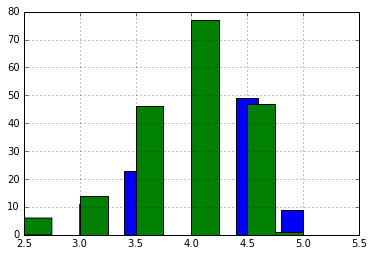

In [60]:
%matplotlib inline
fandago_previous["Fandango_Stars"].hist()
fandango_future["fandango"].hist()

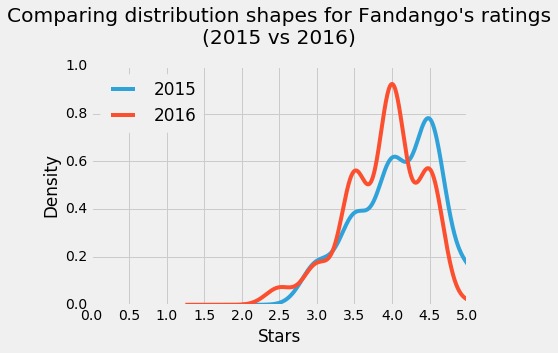

In [80]:
import codecs
from numpy import arange
plt.style.use('fivethirtyeight')
fandago_previous["Fandango_Stars"].plot.kde(label = '2015', legend = True)
fandango_future["fandango"].plot.kde(label = '2016', legend = True)
plt.title(u"Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(arange(0,5.1,.5))
plt.show()

Распределение 2016 г симметричное.Наибольшая часть значений от 3,5 до 4,5
Распредление 2015 г перекошено вправо. Положительно нарпавлено. Большая часть распредления от 4 до 5

В целом фильмы имеют высокие оценки. Распределение 2016 г смещено влево относительно распределения оценок 2015.

Доказательством изменения оценки рейтинга популярных фильмов может являться то, что распределение оценок 2016 г  сдвинуто влево. В 2016 г фильмы оценивались ниже.

### Сравнение относительных частот

In [82]:
fandago_previous["Fandango_Stars"].value_counts()


4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

In [91]:
print('2015' + '\n' + '-' * 16)
fandago_previous["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [88]:
fandango_future["fandango"].value_counts()

4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64

In [92]:
print('2016' + '\n' + '-' * 16)
fandango_future["fandango"].value_counts(normalize=True).sort_index()*100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

В 2016 г высокие оценки 5 и 4.5 встречаются реже (процент ниже), чем в 2015
Самая низкая оценка встречается в 2016 году. Оценки 4 и 3, 5 встречаются чаще в 2016 году. Все это свидетельствует о разнице в двух распределениях  и скорее всего распределение 2016 г смещено влево

### Направление изменения 

In [93]:
fandango_future["fandango"].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

In [94]:
fandago_previous["Fandango_Stars"].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [112]:
mean2015=fandago_previous["Fandango_Stars"].mean()
median2015=fandago_previous["Fandango_Stars"].median()
mode2015=fandago_previous["Fandango_Stars"].mode()[0]
summ = pd.DataFrame()
summ['2015']=[mean2015,median2015,mode2015]

In [123]:
mean2016=fandango_future["fandango"].mean()
median2016=fandango_future["fandango"].median()
mode2016=fandango_future["fandango"].mode()[0]
summ['2016']=[mean2016,median2016,mode2016]
summ.index = ['mean', 'median', 'mode']

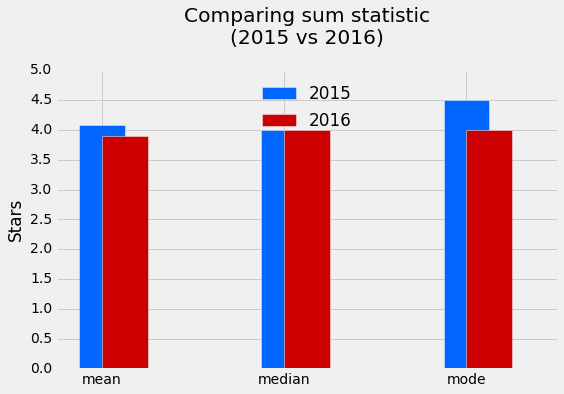

In [139]:
plt.style.use('fivethirtyeight')

summ['2015'].plot.bar(color = '#0066FF', align = 'center',label = '2015', legend = True, width = .25)
summ['2016'].plot.bar(color = '#CC0000', align = 'edge',label = '2016', legend = True,
                         rot = 0, figsize = (8,5), width = .25)
plt.title("Comparing sum statistic\n(2015 vs 2016)",y = 1.07)
plt.ylabel('Stars')
plt.ylim(0,5) 
plt.yticks(arange(0,5.1,.5))

plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Средний рейтинг в 2016 г ниже на 0,2. Медиана одинаковая. Мода для 2016 г ниже. Таким образом изменения на графики плотности ядра подтверждаются описательной статистикой.

**Вывод:** анализ показал, что существует разница между рейтингами популярных фильмов Фандаго в 2015 и 2016 г. В среднем популярные фильмы 2016 г были оценены ниже.